In [1]:
import torch
import torch.nn as nn
import os
from torch.utils.data import DataLoader,random_split
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
import torch.optim as optim
import torch.nn.functional as F
from torchvision.utils import make_grid

In [2]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,11)
        )

    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [3]:
model=NeuralNetwork()
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=11, bias=True)
  )
)

In [4]:
for item in model.parameters():
    print(item)

Parameter containing:
tensor([[ 0.0202, -0.0044, -0.0224,  ..., -0.0247,  0.0350, -0.0033],
        [ 0.0119, -0.0281, -0.0343,  ...,  0.0147, -0.0222, -0.0031],
        [ 0.0149,  0.0084, -0.0012,  ..., -0.0083, -0.0326, -0.0184],
        ...,
        [ 0.0274,  0.0337, -0.0179,  ...,  0.0060,  0.0142,  0.0122],
        [ 0.0218,  0.0282,  0.0286,  ..., -0.0154,  0.0317,  0.0185],
        [ 0.0274, -0.0300, -0.0012,  ..., -0.0054, -0.0342,  0.0331]],
       requires_grad=True)
Parameter containing:
tensor([ 1.9796e-03,  4.1293e-03,  1.7657e-02, -2.9076e-02,  6.4790e-03,
        -6.5577e-03,  2.8824e-02, -4.6274e-03,  3.0778e-02,  1.5061e-03,
         7.6805e-03,  3.5374e-02, -3.2288e-02, -2.9598e-02, -2.1085e-02,
         2.6498e-02,  2.3608e-02, -3.3666e-02, -7.3708e-04,  3.2514e-02,
        -1.9400e-02, -1.1159e-02,  1.1949e-04, -3.4641e-02,  2.2658e-02,
         2.9286e-02,  1.5624e-02, -2.3486e-03,  3.0307e-02, -2.4252e-02,
        -1.4238e-03, -3.0327e-02, -2.1190e-02, -3.0394e-0

In [5]:
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16272097.55it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 325146.25it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5482351.71it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15163115.87it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
#train_data=DataLoader(training_data,shuffle=True)
test_data=DataLoader(test_data,batch_size=64,shuffle=True)

In [7]:
v_size=0.1
data_size=len(training_data)
val_size=int(v_size*data_size)
train_size=data_size-val_size

In [8]:
train_dataset,validation_dataset=random_split(training_data,[train_size,val_size])
train_data=DataLoader(train_dataset,batch_size=64,shuffle=True)
val_data=DataLoader(validation_dataset,batch_size=64,shuffle=True)

In [9]:
learning_rate=0.01
Num_epochs=10
batch_size=64

In [10]:
loss=nn.CrossEntropyLoss()

In [11]:
optimizer=optim.SGD(model.parameters(),lr=learning_rate,momentum=0.7)

In [12]:
def train_loop(dataloader,model,loss_fn,optimizer):
    size=len(dataloader.dataset)
    model.train()# setting the model to training mode
    for batch, (X,y) in enumerate(dataloader):
        pred=model(X)# computing the prediction and loss
        loss=loss_fn(pred,y)
        loss.backward()#performing backward propagataion
        optimizer.step()
        optimizer.zero_grad()
        if batch%100==0:
            loss,current=loss.item(),(batch+1)*len(X)
            print(f"Loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
def test_loop(dataloader,model,loss_fn):
    model.eval()#setting the model to evaluation mode
    size=len(dataloader.dataset)
    num_batches=len(dataloader)
    test_loss,correct=0,0
    with torch.no_grad():# to not calculate the gradients during test mode
        for X,y in dataloader:
            pred=model(X)
            test_loss+=loss_fn(pred,y).item()
            correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
        test_loss/=num_batches
        correct/=size
        print(f"validation error: \n validation loss: {test_loss:>8f}\n")

In [13]:
for t in range(Num_epochs):
    print(f"Epoch {t+1}\n-------------------------------------------")
    train_loop(train_data,model,loss,optimizer)
    test_loop(val_data,model,loss)
print("Done!!!!!!!")

Epoch 1
-------------------------------------------
Loss: 2.399151 [   64/54000]
Loss: 1.469479 [ 6464/54000]
Loss: 0.844912 [12864/54000]
Loss: 0.750746 [19264/54000]
Loss: 0.826063 [25664/54000]
Loss: 0.593747 [32064/54000]
Loss: 0.588964 [38464/54000]
Loss: 0.532621 [44864/54000]
Loss: 0.570629 [51264/54000]
validation error: 
 validation loss: 0.574982

Epoch 2
-------------------------------------------
Loss: 0.562986 [   64/54000]
Loss: 0.491878 [ 6464/54000]
Loss: 0.479692 [12864/54000]
Loss: 0.693917 [19264/54000]
Loss: 0.582616 [25664/54000]
Loss: 0.472765 [32064/54000]
Loss: 0.553427 [38464/54000]
Loss: 0.466170 [44864/54000]
Loss: 0.602266 [51264/54000]
validation error: 
 validation loss: 0.498317

Epoch 3
-------------------------------------------
Loss: 0.528200 [   64/54000]
Loss: 0.501709 [ 6464/54000]
Loss: 0.576221 [12864/54000]
Loss: 0.398370 [19264/54000]
Loss: 0.413708 [25664/54000]
Loss: 0.370650 [32064/54000]
Loss: 0.528302 [38464/54000]
Loss: 0.350575 [44864/540

In [14]:
torch.save(model,'model.pth')
model=torch.load('model.pth')

In [15]:
import matplotlib.pyplot as plt

# Display image and label.
train_features, train_labels = next(iter(train_data))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [16]:
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=11, bias=True)
  )
)

In [17]:
labels_map=[
    "T-Shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot"
]

In [18]:
predictions = []
for batch in test_data:
    inputs, _ = batch  # Assuming the DataLoader returns inputs and labels, but we're only interested in inputs
    with torch.no_grad():
        outputs = model(inputs)  # Forward pass to get predictions
    probabilities = F.softmax(outputs, dim=1)
    _, predicted_classes = torch.max(probabilities, 1)
    predictions.extend(predicted_classes.tolist())

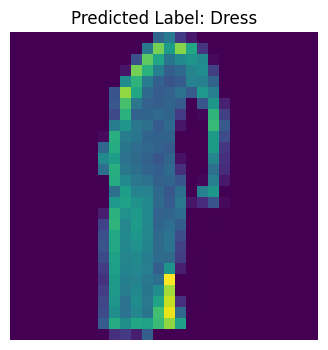

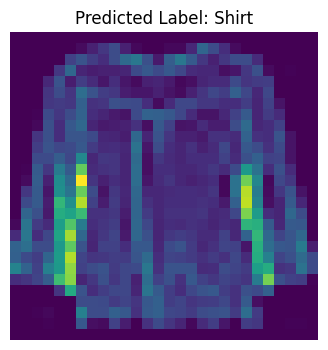

In [24]:
for batch_idx, (inputs, labels) in enumerate(test_data):
    if batch_idx >= 2:
        break  # Only process the first two batches

    # Forward pass to get predictions
    with torch.no_grad():
        outputs = model(inputs)
    probabilities = F.softmax(outputs, dim=1)
    _, predicted_classes = torch.max(probabilities, 1)

    # Convert the predicted class index to class label
    predicted_label = labels_map[predicted_classes[0].item()]

    # Display the image and its corresponding predicted label
    plt.figure(figsize=(4, 4))
    plt.imshow(inputs[0].permute(1, 2, 0))
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()